In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'C:/Users/hp/Downloads/USvideos.csv'
df = pd.read_csv(file_path)

In [3]:
print(df.head(10))

      video_id trending_date  \
0  2kyS6SvSYSE      17.14.11   
1  1ZAPwfrtAFY      17.14.11   
2  5qpjK5DgCt4      17.14.11   
3  puqaWrEC7tY      17.14.11   
4  d380meD0W0M      17.14.11   
5  gHZ1Qz0KiKM      17.14.11   
6  39idVpFF7NQ      17.14.11   
7  nc99ccSXST0      17.14.11   
8  jr9QtXwC9vc      17.14.11   
9  TUmyygCMMGA      17.14.11   

                                               title          channel_title  \
0                 WE WANT TO TALK ABOUT OUR MARRIAGE           CaseyNeistat   
1  The Trump Presidency: Last Week Tonight with J...        LastWeekTonight   
2  Racist Superman | Rudy Mancuso, King Bach & Le...           Rudy Mancuso   
3                   Nickelback Lyrics: Real or Fake?  Good Mythical Morning   
4                           I Dare You: GOING BALD!?               nigahiga   
5                              2 Weeks with iPhone X               iJustine   
6          Roy Moore & Jeff Sessions Cold Open - SNL    Saturday Night Live   
7              

In [4]:
print("\nSummary statistics of the DataFrame:")
print(df.describe())


Summary statistics of the DataFrame:
        category_id         views         likes      dislikes  comment_count
count  40949.000000  4.094900e+04  4.094900e+04  4.094900e+04   4.094900e+04
mean      19.972429  2.360785e+06  7.426670e+04  3.711401e+03   8.446804e+03
std        7.568327  7.394114e+06  2.288853e+05  2.902971e+04   3.743049e+04
min        1.000000  5.490000e+02  0.000000e+00  0.000000e+00   0.000000e+00
25%       17.000000  2.423290e+05  5.424000e+03  2.020000e+02   6.140000e+02
50%       24.000000  6.818610e+05  1.809100e+04  6.310000e+02   1.856000e+03
75%       25.000000  1.823157e+06  5.541700e+04  1.938000e+03   5.755000e+03
max       43.000000  2.252119e+08  5.613827e+06  1.674420e+06   1.361580e+06


In [5]:
print("\nShape of the DataFrame:")
print(df.shape)

# Display the non-null count and data types
print("\nNon-null count and data types:")
print(df.info())

# Display the count of non-null entries in each column
print("\nCount of non-null entries in each column:")
print(df.count())


Shape of the DataFrame:
(40949, 16)

Non-null count and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-nul

In [6]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [7]:
# Create new columns for publish month, day, and hour
df['publish_month'] = df['publish_time'].dt.month
df['publish_day'] = df['publish_time'].dt.day
df['publish_hour'] = df['publish_time'].dt.hour

In [8]:
df['publish_year'] = df['publish_time'].dt.year

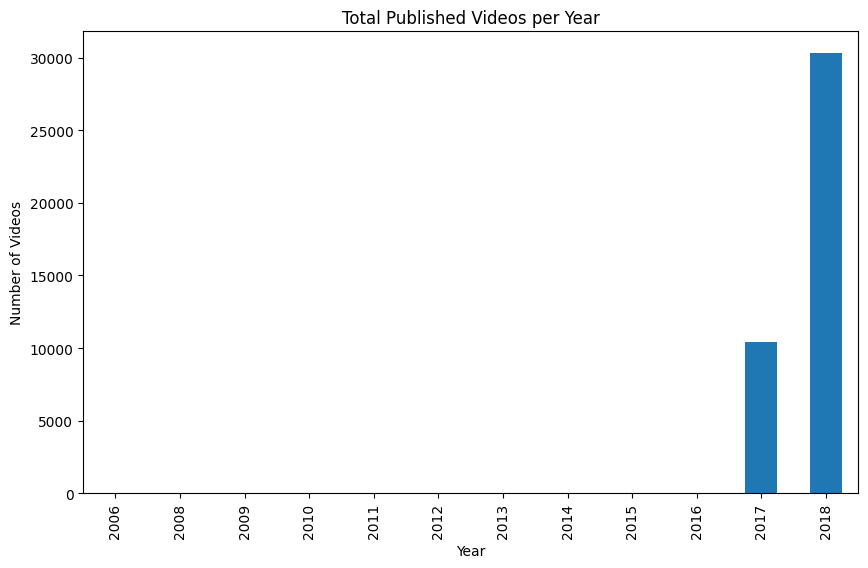

In [9]:
# Bar chart for total published videos per year
videos_per_year = df['publish_year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
videos_per_year.plot(kind='bar')
plt.title('Total Published Videos per Year')
plt.xlabel('Year')
plt.ylabel('Number of Videos')
plt.show()

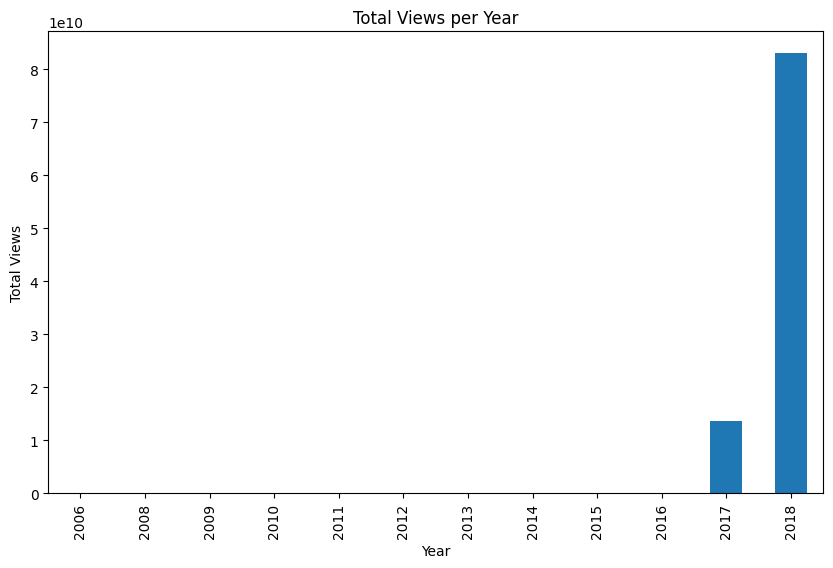

In [10]:
views_per_year = df.groupby('publish_year')['views'].sum()
plt.figure(figsize=(10, 6))
views_per_year.plot(kind='bar')
plt.title('Total Views per Year')
plt.xlabel('Year')
plt.ylabel('Total Views')
plt.show()

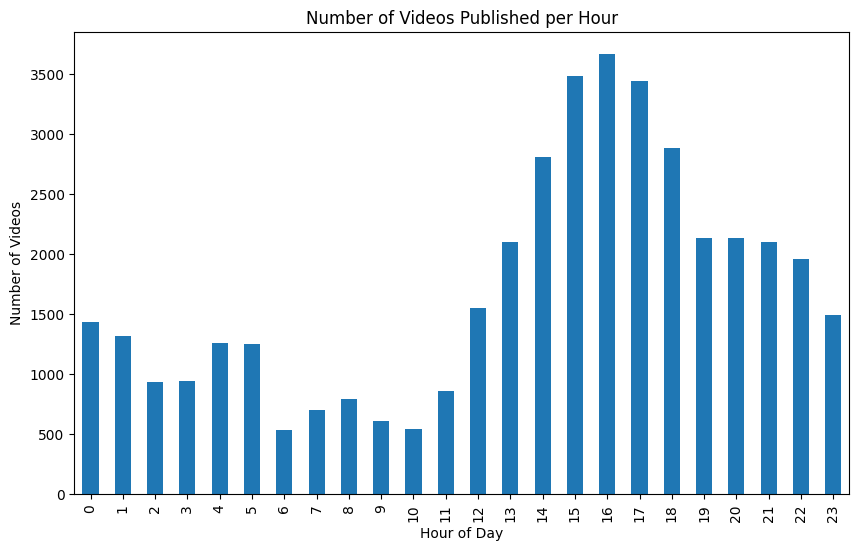

In [11]:
videos_per_hour = df['publish_hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
videos_per_hour.plot(kind='bar')
plt.title('Number of Videos Published per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Videos')
plt.show()

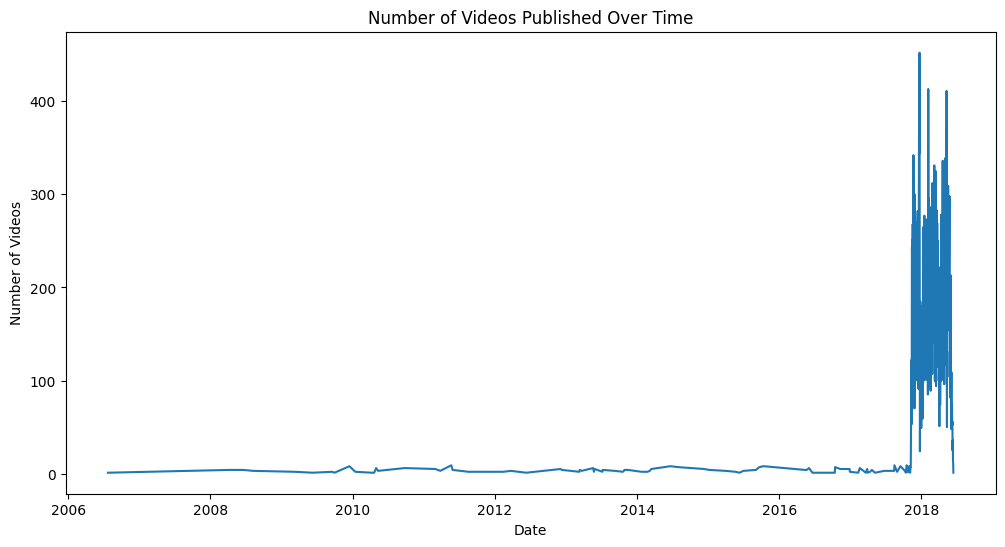

In [12]:
# Line chart for the number of videos published over time
videos_over_time = df['publish_time'].dt.date.value_counts().sort_index()
plt.figure(figsize=(12, 6))
videos_over_time.plot(kind='line')
plt.title('Number of Videos Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.show()

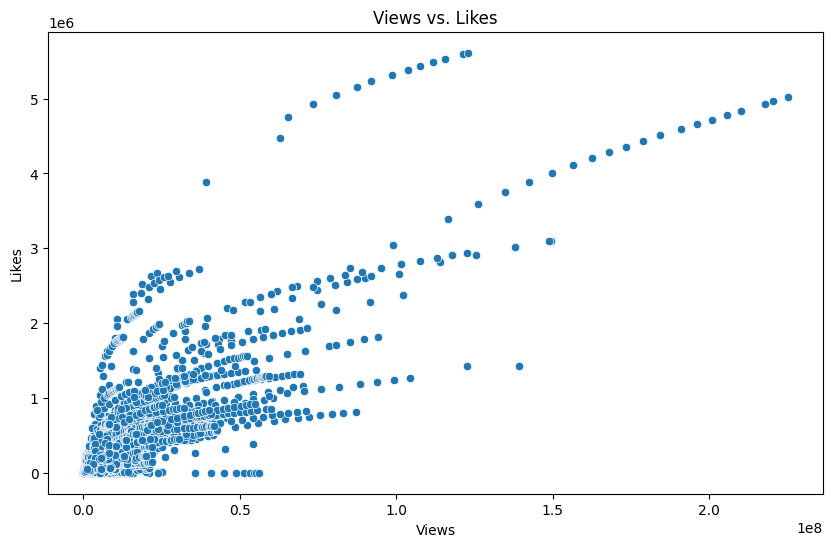

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='views', y='likes', data=df)
plt.title('Views vs. Likes')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.show()

In [20]:
corr_matrix = df['views'].corr(df['likes'])
corr_matrix

0.8491765212088969